In [8]:
%matplotlib inline
import sys, os
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import sys
import sql_tools as sql
from scipy.stats import binned_statistic_2d as bs2d
from scipy.stats import binned_statistic as bs1d

Populating the interactive namespace from numpy and matplotlib


In [4]:
con         = sql.connect(user="jtrayford")                                                                                                                                                                                             
query       = """                                                                                                                                                                                                                 
            select                                                                                                                                                                                                                          
                                                                                                                                                                                                                                            
            sb.galaxyid, sb.snapnum,
            sb.groupnumber, sb.subgroupnumber, ap.mass_star,
            sb.redshift, sb.stars_metallicity, sb.sf_metallicity, 
            sb.nsf_metallicity, ap.sfr
            
            from                                                                                                                                                                                                                            
                                                                                                                                                                                                                                            
            eagle..recalL0025N0752_aperture as ap,
            eagle..recalL0025N0752_subhalo as sb

            
            where                                                                                                                                                                                                                           
                                                                                                                                                                                                                                            
            (ap.galaxyid = sb.galaxyid) and
            (ap.aperturesize = 30) and 
            (sb.snapnum = %d) and
            (ap.mass_star > POWER(10, 8.5))
            
            order by
            
            sb.randomnumber
                                                                                                                                                           
                    """

In [5]:
dats = {}
for i in range(5,29):
    dats[i] = sql.execute_query(con, query%i)

fetch  1
fetch  0
fetch  4
fetch  0
fetch  14
fetch  0
fetch  26
fetch  0
fetch  48
fetch  0
fetch  80
fetch  0
fetch  108
fetch  0
fetch  148
fetch  0
fetch  193
fetch  0
fetch  214
fetch  0
fetch  233
fetch  0
fetch  261
fetch  0
fetch  289
fetch  0
fetch  313
fetch  0
fetch  354
fetch  0
fetch  377
fetch  0
fetch  387
fetch  0
fetch  397
fetch  0
fetch  404
fetch  0
fetch  415
fetch  0
fetch  422
fetch  0
fetch  432
fetch  0
fetch  432
fetch  0
fetch  431
fetch  0


[ 8.5  8.7  8.9  9.1  9.3  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9 11.1
 11.3 11.5]
7.049566268920898


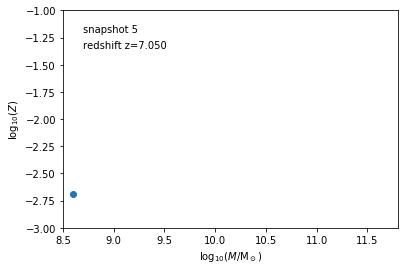

5.97116231918335


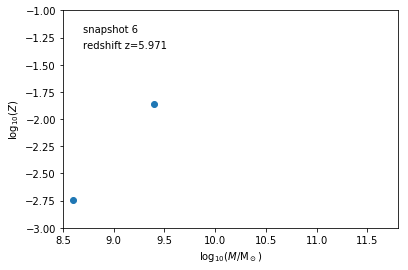

5.487415313720703


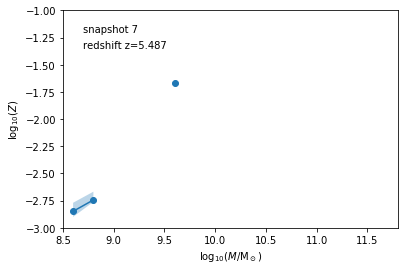

5.03723669052124


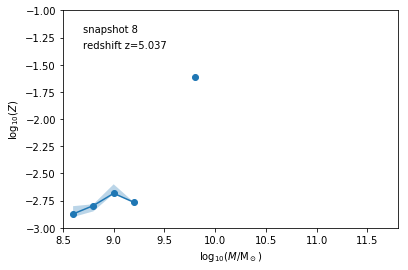

4.485213756561279


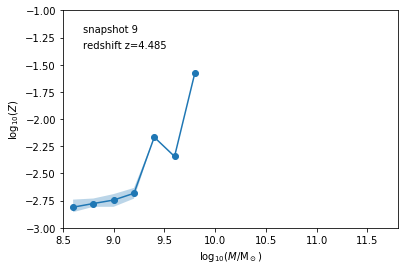

3.983663558959961


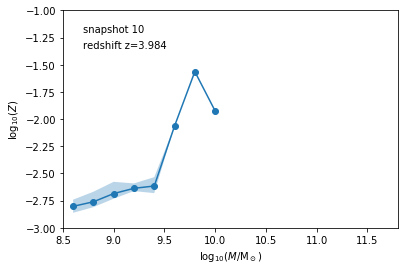

3.5279765129089355


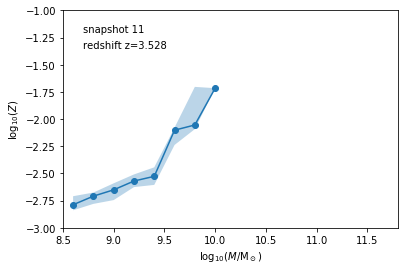

3.0165045261383057


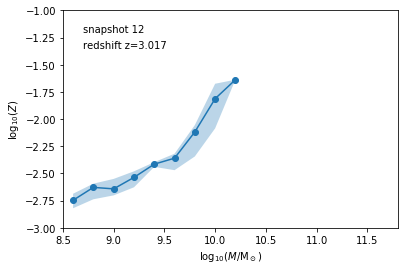

2.4784133434295654


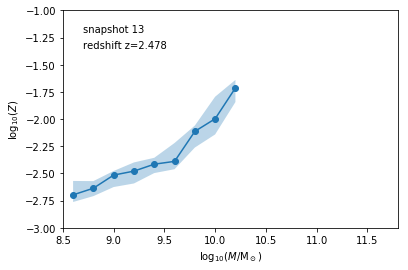

2.237036943435669


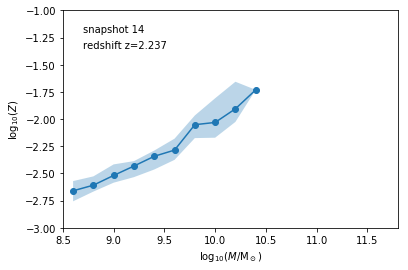

2.0124101638793945


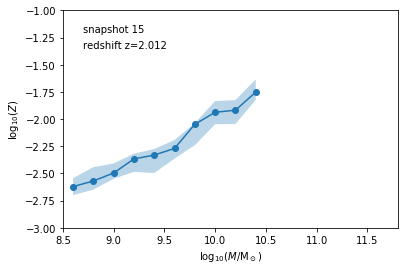

1.7369657754898071


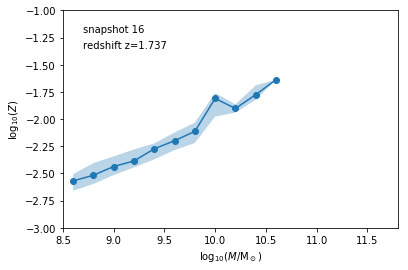

1.486707329750061


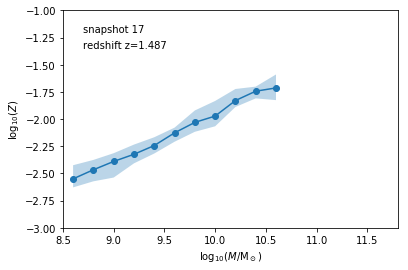

1.259331464767456


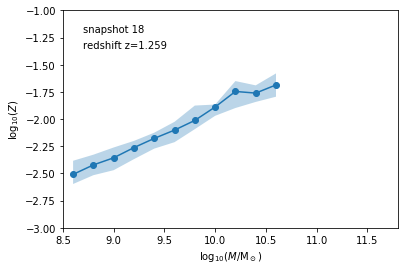

1.0041216611862183


/cosma/local/Python/2.7.15/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/cosma/local/Python/2.7.15/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/cosma/local/Python/2.7.15/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


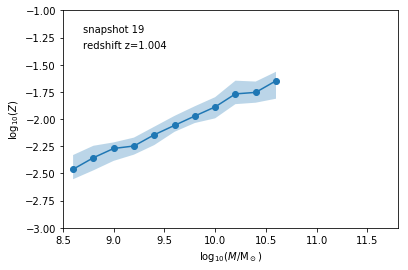

0.8650505542755127


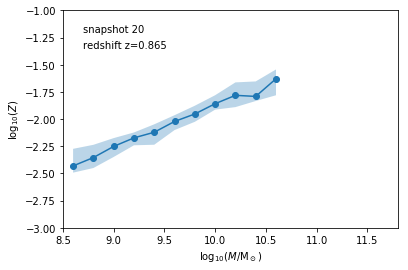

0.7356296181678772


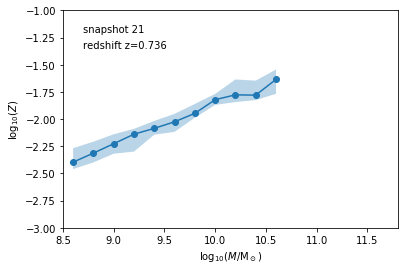

0.615189790725708


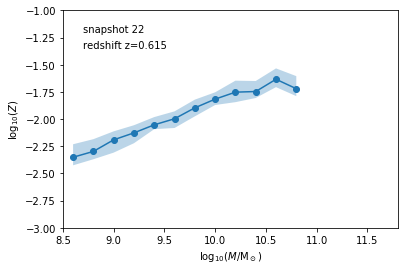

0.5031073093414307


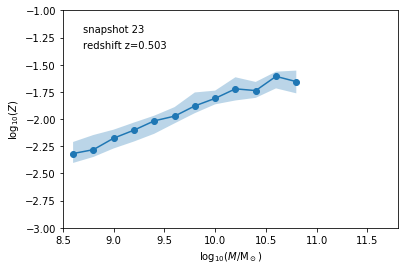

0.36566856503486633


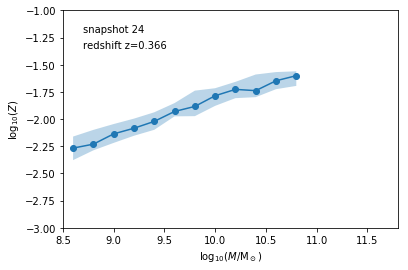

0.270901083946228


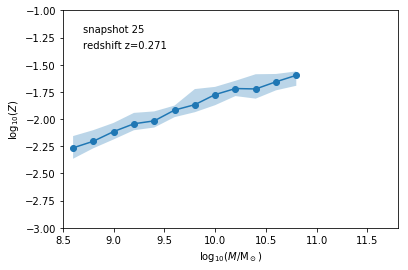

0.18270987272262573


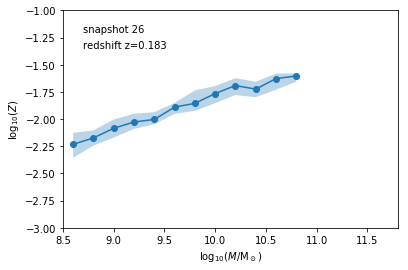

0.10063853859901428


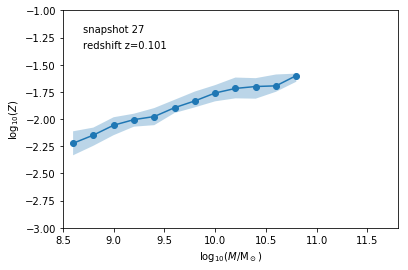

2.220446049250313e-16


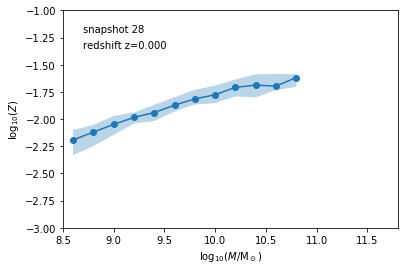

In [16]:
bins = np.linspace(8.5, 11.5, 16)
bmid = bins[:-1] + np.diff(bins)*0.5

print bins

usig = lambda x: np.percentile(x, 84)
lsig = lambda x: np.percentile(x, 16)



for i in range(5,29):
    sbs, _, _ = bs1d(np.log10(dats[i]['mass_star']), np.log10(dats[i]['stars_metallicity']), bins=bins, statistic = 'median')
    sC, _, _ = bs1d(np.log10(dats[i]['mass_star']), np.log10(dats[i]['stars_metallicity']), bins=bins, statistic = 'count')
    spsig, _, _ = bs1d(np.log10(dats[i]['mass_star']), np.log10(dats[i]['stars_metallicity']), bins=bins, statistic = usig)
    snsig, _, _ = bs1d(np.log10(dats[i]['mass_star']), np.log10(dats[i]['stars_metallicity']), bins=bins, statistic = lsig)

    sfdx = dats[i]['sfr'] > 0 
     
    sfbs, _, _ = bs1d(np.log10(dats[i]['mass_star'])[sfdx], np.log10(dats[i]['sf_metallicity'])[sfdx], bins=bins, statistic = 'median')
    sfC, _, _ = bs1d(np.log10(dats[i]['mass_star'])[sfdx], (sfdx).astype(int)[sfdx], bins=bins, statistic = 'sum')
    sfpsig, _, _ = bs1d(np.log10(dats[i]['mass_star'])[sfdx], np.log10(dats[i]['sf_metallicity'])[sfdx], bins=bins, statistic = usig)
    sfnsig, _, _ = bs1d(np.log10(dats[i]['mass_star'])[sfdx], np.log10(dats[i]['sf_metallicity'])[sfdx], bins=bins, statistic = lsig)

    
    plt.plot(bmid, sbs, 'o-', label = r'$z=' + '%.2f'%dats[i]['redshift'][0] + r'$')
    plt.fill_between(bmid, spsig, snsig, facecolor='C0', alpha=0.3)
    plt.text(8.7, -1.2, 'snapshot %d'%i)
    plt.text(8.7, -1.35, 'redshift z=%.3f'%dats[i]['redshift'][0])
#     plt.plot(bmid, spsig, 'o-', label = r'$z=' + '%.2f'%dats[i]['redshift'][0] + r'$')
#     plt.plot(bmid, snsig, 'o-', label = r'$z=' + '%.2f'%dats[i]['redshift'][0] + r'$')

    data = np.column_stack([bmid, 
                     sbs, spsig, snsig, sC,
                     sfbs, sfpsig, sfnsig, sfC])
    np.savetxt('MZrel_hires_snapshot%02d.txt'%i, data, 
               header = 'z = %.3f \n Columns: log10(M*/Msun) bin mids | median Z* | 16th pecentile Z* | 84th percentile Z* | galaxy count |  median Z SFgas | 16th pecentile Z SFgas | 84th percentile Z SFgas | SF galaxy count" '%dats[i]['redshift'][0])
    
    plt.ylim(-3,-1)
    plt.xlim(8.5,11.8)
    plt.ylabel(r'$\log_{10}(Z)$')
    plt.xlabel(r'$\log_{10}(M/{\rm M_\odot})$')
    print dats[i]['redshift'][0]
    plt.show()


In [7]:
con         = sql.connect(user="jtrayford")                                                                                                                                                                                             
query50     = """                                                                                                                                                                                                                 
            select                                                                                                                                                                                                                          
                                                                                                                                                                                                                                                 
            sb.galaxyid, sb.snapnum,
            sb.groupnumber, sb.subgroupnumber, ap.mass_star,
            sb.redshift, sb.stars_metallicity, sb.sf_metallicity, 
            sb.nsf_metallicity, ap.sfr,
            sb.centreofpotential_x as x,
            sb.centreofpotential_y as y,
            sb.centreofpotential_z as z
            
            from                                                                                                                                                                                                                            
                                                                                                                                                                                                                                            
            eagle..refL0050N0752_aperture as ap,
            eagle..refL0050N0752_subhalo as sb

            
            where                                                                                                                                                                                                                           
                                                                                                                                                                                                                                            
            (ap.galaxyid = sb.galaxyid) and
            (ap.aperturesize = 30) and 
            (sb.snapnum = %d) and
            (ap.mass_star > POWER(10, 9))
            
            order by
            
            sb.randomnumber
                                                                                                                                                      
                    """
query50nagn = """                                                                                                                                                                                                                 
            select                                                                                                                                                                                                                          
                                                                                                                                                                                                                                                 
            sb.galaxyid, sb.snapnum,
            sb.groupnumber, sb.subgroupnumber, ap.mass_star,
            sb.redshift, sb.stars_metallicity, sb.sf_metallicity, 
            sb.nsf_metallicity, ap.sfr,
            sb.centreofpotential_x as x,
            sb.centreofpotential_y as y,
            sb.centreofpotential_z as z
            
            from                                                                                                                                                                                                                            
                                                                                                                                                                                                                                            
            eagle..noagnL0050N0752_aperture as ap,
            eagle..noagnL0050N0752_subhalo as sb

            
            where                                                                                                                                                                                                                           
                                                                                                                                                                                                                                            
            (ap.galaxyid = sb.galaxyid) and
            (ap.aperturesize = 30) and 
            (sb.snapnum = %d) and
            (ap.mass_star > POWER(10, 9))
            
            order by
            
            sb.randomnumber
                                                                                                                                                      
                    """


In [12]:

for i in [15,19,23,27]:
    data1 = sql.execute_query(con, query50%i)
    data2 = sql.execute_query(con, query50nagn%i)
    d50   = np.column_stack([data1['groupnumber'], data1['subgroupnumber'], data1['snapnum'], 
                    data1['galaxyid'], data1['mass_star'], data1['x'], data1['y'], data1['z'], 
                    data1['mass_star']])
    d50nagn = np.column_stack([data2['groupnumber'], data2['subgroupnumber'], data2['snapnum'], 
                    data2['galaxyid'], data2['mass_star'], data2['x'], data2['y'], data2['z'], 
                    data2['mass_star']])
    np.savetxt('/cosma/home/dp004/wmfw23/cosma5/resolved_quantities/template/survsel_Ref50_s%d.dat'%i, 
               d50, fmt = ['%d']*4+['%.8f']*5)
    np.savetxt('/cosma/home/dp004/wmfw23/cosma5/resolved_quantities/template/survsel_NoAGN50_s%d.dat'%i, 
               d50nagn, fmt = ['%d']*4+['%.8f']*5)

fetch  1011
fetch  0
fetch  1032
fetch  0
fetch  1672
fetch  0
fetch  1701
fetch  0
fetch  1797
fetch  0
fetch  1848
fetch  0
fetch  1770
fetch  0
fetch  1792
fetch  0
